In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Data Exploration

In [2]:
df = pd.read_csv('data.csv')

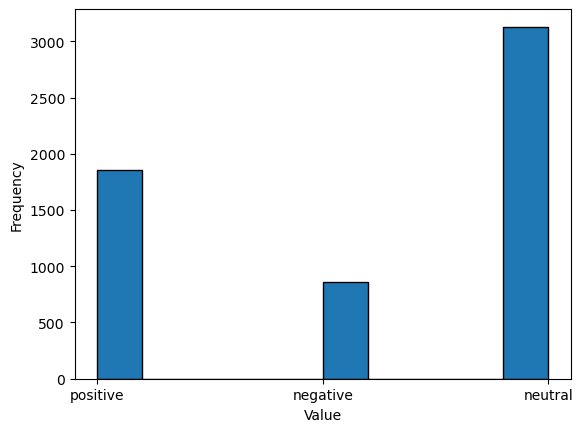

In [3]:
plt.hist(df['Sentiment'], bins=10, edgecolor='black')

# Add titles and labels
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

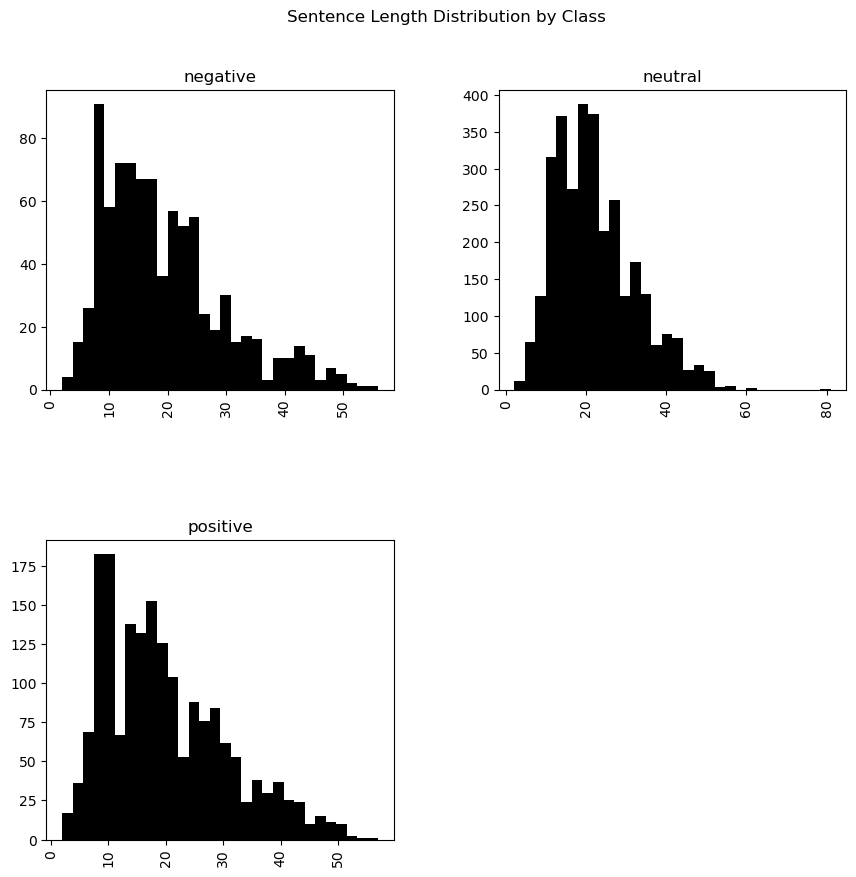

In [4]:
df['Sentence_length'] = df['Sentence'].apply(lambda x: len(x.split()))

# Plot sentence length distribution
df['Sentence_length'].hist(by=df['Sentiment'], bins=30, figsize=(10, 10),color='black')
plt.suptitle('Sentence Length Distribution by Class')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()


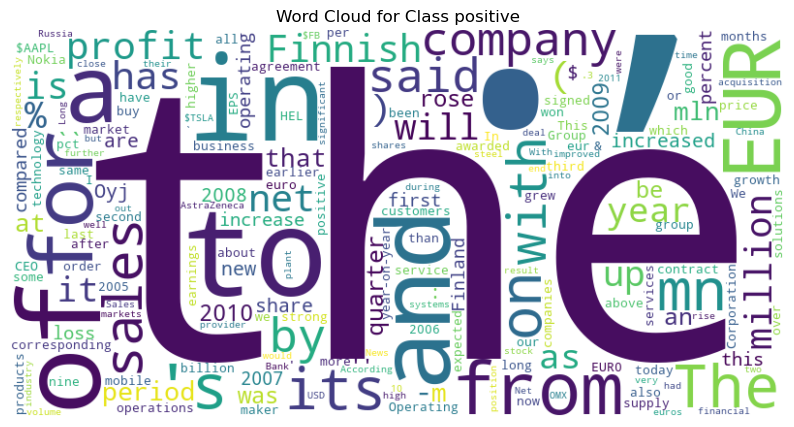

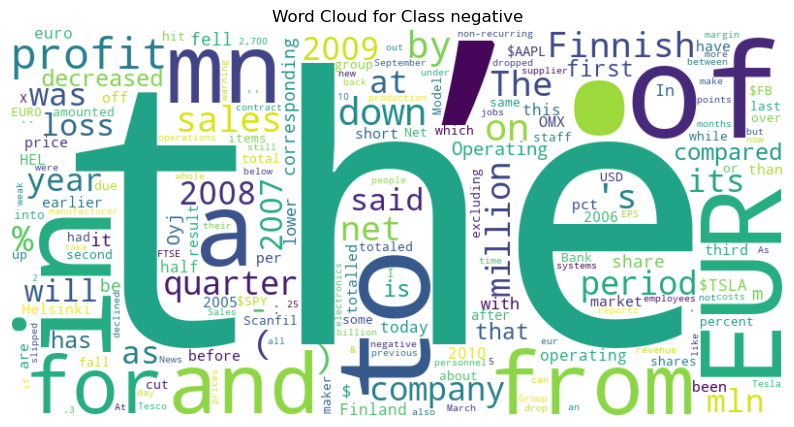

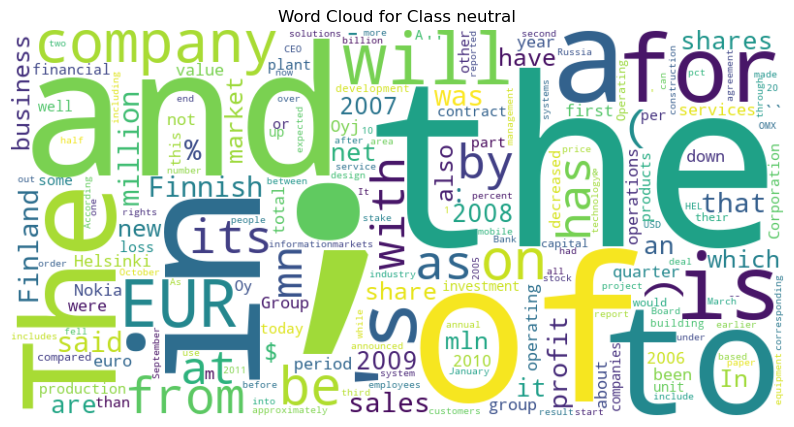

In [5]:
from collections import Counter
from wordcloud import WordCloud

def plot_wordcloud(data, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(data)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

for label in df['Sentiment'].unique():
    words = ' '.join(df[df['Sentiment'] == label]['Sentence']).split()
    word_freq = Counter(words)
    plot_wordcloud(word_freq, f'Word Cloud for Class {label}')


We can clearly see here, that the stopwords are the most frequent words in each class. Therefore we can remove them.

# Data Preprocessing

In [6]:
df.dropna(inplace=True) #Drop rows that contain null values just in case

In [7]:
df['Sentiment'] = df['Sentiment'].map({'positive':1,'negative':-1,'neutral':0})

In [8]:
df

,Sentence,Sentiment,Sentence_length
0,The GeoSolutions technology will leverage Bene...,1,32
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",-1,11
2,"For the last quarter of 2010 , Componenta 's n...",1,39
3,According to the Finnish-Russian Chamber of Co...,0,20
4,The Swedish buyout firm has sold its remaining...,0,23
...,...,...,...
5837,RISING costs have forced packaging producer Hu...,-1,17
5838,Nordic Walking was first used as a summer trai...,0,14
5839,"According shipping company Viking Line , the E...",0,16
5840,"In the building and home improvement trade , s...",0,18


# Balancing the dataset

In order to balance the dataset, we will add more instances from another dataset called "Forex News Annotated Dataset for Sentiment Analysis". You can find it here at https://zenodo.org/records/7976208

In [9]:
df2 = pd.read_csv('sentiment_annotated_with_texts.csv')

In [10]:
df2 = df2[['text','true_sentiment']]

In [11]:
df2.rename(columns={'text': 'Sentence', 'true_sentiment': 'Sentiment'}, inplace=True)

In [12]:
df2['Sentiment'] = df2['Sentiment'].map({'Positive':1,'Negative':-1,'Neutral':0})

In [13]:
sub_df2 = df2[df2['Sentiment'] != 0]

In [14]:
df = pd.concat([df,sub_df2])

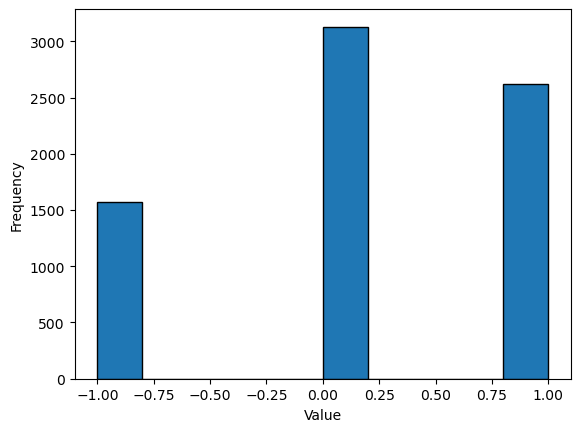

In [15]:
plt.hist(df['Sentiment'], bins=10, edgecolor='black')
# Add titles and labels
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

As we can see, the dataset it much more balanced.

## Removing  Stopwords Punctuation and Lowecase the Text

In [16]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
stop_words = set(stopwords.words('english')).union({"said", "EU", "mn",'$','%','eur','finnish','(',')','us','finland'})
def remove_stopwords(sentence):
    sentence=sentence.lower()
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))
    words = word_tokenize(sentence)
    filtered_sentence = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_sentence)

In [17]:
sentences = df['Sentence']
sentences_no_stopwords = [remove_stopwords(sentence) for sentence in sentences]
df['Sentence'] = sentences_no_stopwords

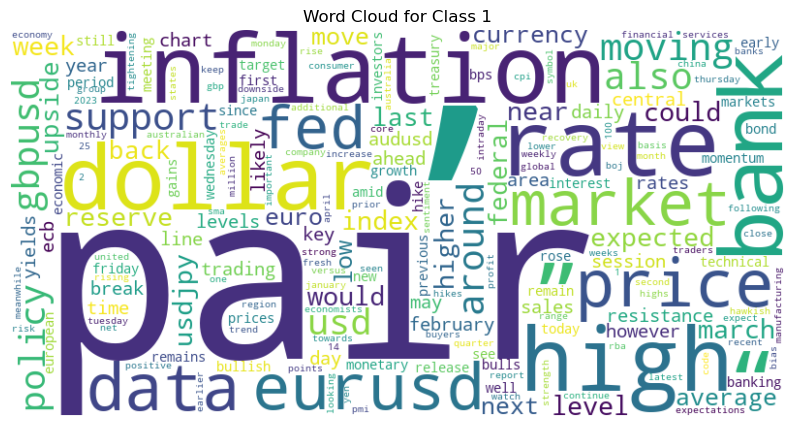

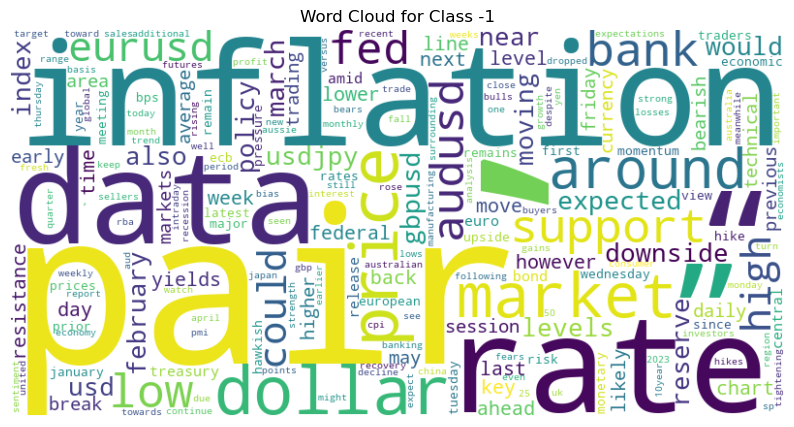

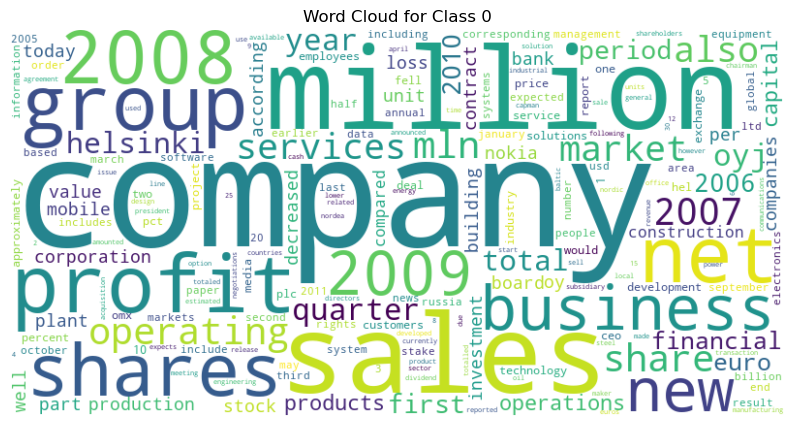

In [18]:
for label in df['Sentiment'].unique():
    words = ' '.join(df[df['Sentiment'] == label]['Sentence']).split()
    word_freq = Counter(words)
    plot_wordcloud(word_freq, f'Word Cloud for Class {label}')

After dropping unnecessary words, such as stopwords, we can clearly see that we have much more words that have positive financial sentiment in class 1 such as "Increased","Rose","Rise" while in class -1 there are more words that has negative sentiment like "Decreased","Negative,"Fall".

# Splitting the dataset and extracting features

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Features and target variable
X = df['Sentence']
y = df['Sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_df=0.8,min_df=3)

# Fit on training data
X_train_transformed = vectorizer.fit_transform(X_train)

# Transform test data using the same vectorizer
X_test_transformed = vectorizer.transform(X_test)

In [20]:
X_train_transformed

<5854x7266 sparse matrix of type '<class 'numpy.float64'>'
	with 185025 stored elements in Compressed Sparse Row format>

# Reducing the dimensions of the data

In [21]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=1500)

# X_train_reduced =  svd.fit_transform(X_train_transformed)
# X_test_reduced = svd.transform(X_test_transformed)

X_train_reduced =  X_train_transformed
X_test_reduced = X_test_transformed

In [22]:
pd.DataFrame(X_train_reduced)

,0
0,"(0, 6188)\t0.4857894636413515\n (0, 1766)\t..."
1,"(0, 3043)\t0.5461171839250322\n (0, 5893)\t..."
2,"(0, 3221)\t0.34284109530702184\n (0, 2814)\..."
3,"(0, 804)\t0.34128594428021786\n (0, 5915)\t..."
4,"(0, 2531)\t0.6860134382584798\n (0, 2362)\t..."
...,...
5849,"(0, 725)\t0.3381461801954536\n (0, 3280)\t0..."
5850,"(0, 6917)\t0.5383460028588174\n (0, 1253)\t..."
5851,"(0, 2194)\t0.47167124747054456\n (0, 3069)\..."
5852,"(0, 2327)\t0.43511331030789996\n (0, 1727)\..."


# Training Models On The Data

# KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize k-NN classifier
k = 25  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the classifier on the training data
knn.fit(X_train_reduced, y_train)


KNeighborsClassifier(n_neighbors=25)

In [24]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = knn.predict(X_test_reduced)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.64275956284153
Classification Report:
               precision    recall  f1-score   support

          -1       0.56      0.31      0.40       314
           0       0.67      0.88      0.76       625
           1       0.63      0.56      0.59       525

    accuracy                           0.64      1464
   macro avg       0.62      0.58      0.58      1464
weighted avg       0.63      0.64      0.62      1464



# Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier on the training data
clf.fit(X_train_reduced, y_train)


DecisionTreeClassifier(random_state=42)

In [26]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = clf.predict(X_test_reduced)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.5635245901639344
Classification Report:
               precision    recall  f1-score   support

          -1       0.33      0.36      0.34       314
           0       0.65      0.62      0.63       625
           1       0.62      0.62      0.62       525

    accuracy                           0.56      1464
   macro avg       0.53      0.53      0.53      1464
weighted avg       0.57      0.56      0.57      1464



# SVM

In [27]:
from sklearn.svm import SVC

# Initialize SVM classifier
clf = SVC(kernel='linear', random_state=42)

# Fit the classifier on the training data
clf.fit(X_train_reduced, y_train)


SVC(kernel='linear', random_state=42)

In [28]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = clf.predict(X_test_reduced)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.680327868852459
Classification Report:
               precision    recall  f1-score   support

          -1       0.55      0.38      0.45       314
           0       0.68      0.85      0.76       625
           1       0.74      0.66      0.70       525

    accuracy                           0.68      1464
   macro avg       0.66      0.63      0.63      1464
weighted avg       0.67      0.68      0.67      1464



# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression classifier
log_reg = LogisticRegression(random_state=42)

# Fit the classifier on the training data
log_reg.fit(X_train_reduced, y_train)


LogisticRegression(random_state=42)

In [30]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = log_reg.predict(X_test_reduced)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.680327868852459
Classification Report:
               precision    recall  f1-score   support

          -1       0.58      0.36      0.45       314
           0       0.68      0.85      0.76       625
           1       0.72      0.67      0.69       525

    accuracy                           0.68      1464
   macro avg       0.66      0.63      0.63      1464
weighted avg       0.67      0.68      0.67      1464



# Ensemble methods

In [31]:
from sklearn.ensemble import VotingClassifier


model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = SVC(probability=True)  # Note: Use `probability=True` for soft voting
model4 = KNeighborsClassifier(n_neighbors=25)


In [32]:
# For Hard Voting
voting_clf_hard = VotingClassifier(
    estimators=[('lr', model1), ('dt', model2), ('svc', model3), ('knn', model4)],
    voting='hard',
    weights=[3, 1, 3, 2]
)

# For Soft Voting
voting_clf_soft = VotingClassifier(
    estimators=[('lr', model1), ('dt', model2), ('svc', model3), ('knn', model4)],
    voting='soft',
    weights=[3, 1, 3, 2]
)


In [33]:
voting_clf_hard.fit(X_train_reduced, y_train)
voting_clf_soft.fit(X_train_reduced, y_train)


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('svc', SVC(probability=True)),
                             ('knn', KNeighborsClassifier(n_neighbors=25))],
                 voting='soft', weights=[3, 1, 3, 2])

In [34]:
y_pred_hard = voting_clf_hard.predict(X_test_reduced)
y_pred_soft = voting_clf_soft.predict(X_test_reduced)


In [35]:
from sklearn.metrics import accuracy_score

accuracy_hard = accuracy_score(y_test, y_pred_hard)
accuracy_soft = accuracy_score(y_test, y_pred_soft)

print(f'Hard Voting Accuracy: {accuracy_hard}')
print(f'Soft Voting Accuracy: {accuracy_soft}')


Hard Voting Accuracy: 0.671448087431694
Soft Voting Accuracy: 0.6612021857923497


In [97]:
def predict_text(text):
    # Ensure the text is passed as a list of one element
    vec = vectorizer.transform([text])
    pred = clf.predict(vec)
    return pred

# Example usage
print(predict_text("After the announcement of the merger, the stock price soared, indicating strong investor confidence in the company's strategic decisions."))



[0]
